<a href="https://colab.research.google.com/github/NULLPX-a/Alura-challenge-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis de ventas - Alura Store Latam
En este proyecto se realiza un analisis exploratorio de dato (EDA) sobre las ventas de distintas tiendas de Alura Store Latam.

El objetivo es analizar el rendimiento de cada tienda y obtener conclusiones que permitan tomar una desicion estrategica basada en datos.

### Importación de datos



In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, box

In [3]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


## Objetivo

Determinar cual tienda tiene el menor rendimiento considerando:
- Facturacion total
- Categorias mas Vendidas
- Productos mas y menos vendidos
- Calificaciones Promedio
- Costos de envio

con base a estos indicadoresm se propondar una recomendacion final.

#Analisis de facturacion

##1. Ingreso total por cada tienda.



In [4]:

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
facturacion = df.groupby('Tienda')['Precio'].sum()

for tienda, total in facturacion.items():
    print(f"{tienda}: ${total:,.0f}")

print("La tienda con más ingresos es:", facturacion.idxmax())

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700
La tienda con más ingresos es: Tienda 1


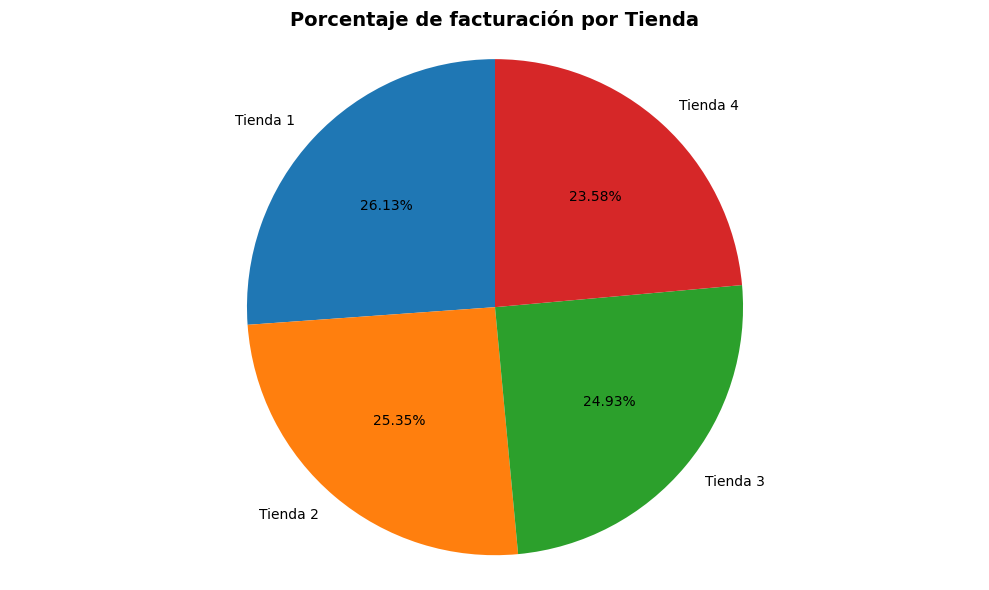

In [ ]:
facturacion_grafica = df.groupby('Tienda')['Precio'].sum()
total = facturacion_grafica.sum()
num_total = float(total)

plt.figure(figsize=(10, 6))
plt.pie(
    facturacion_grafica,
    labels=facturacion_grafica.index,
    autopct='%1.2f%%',  # ← Changed here
    startangle=90,
)
plt.title('Porcentaje de facturación por Tienda', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2. Ventas por categoría

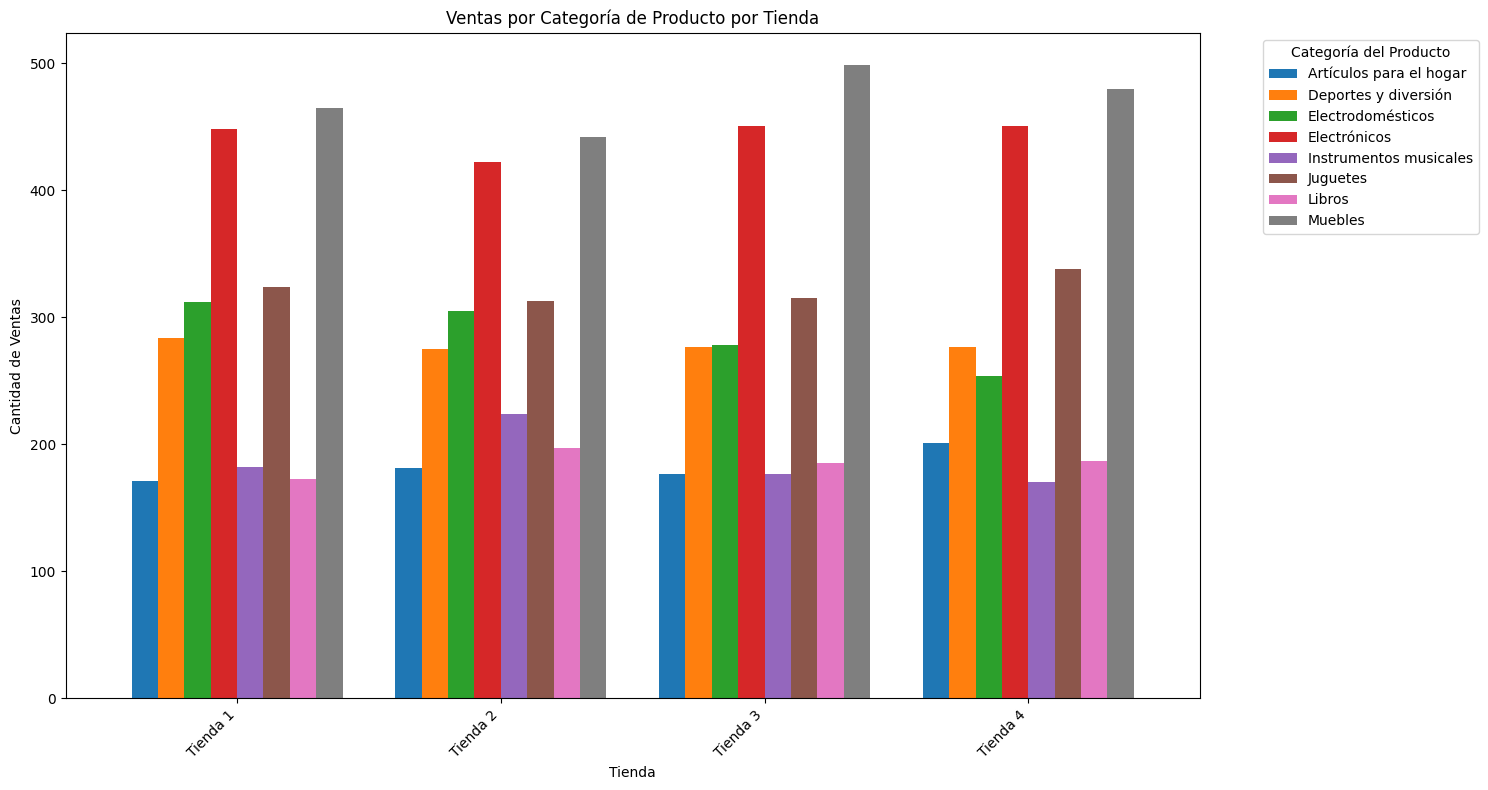

In [ ]:
ventas_por_categoria_df = df.groupby(['Tienda', 'Categoría del Producto']).size().unstack(fill_value=0)

ventas_por_categoria_df.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title('Ventas por Categoría de Producto por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Productos por categoria mas vendidos en cada tienda \nen orden descendente:")
print()
for nombre_tienda, grupo in df.groupby('Tienda'):
  print(f'---[{nombre_tienda}]---')
  top_categorias = grupo['Categoría del Producto'].value_counts()
  for categoria, cantidad in top_categorias.items():
    print(f'{categoria}: {cantidad}')
  print()


Productos por categoria mas vendidos en cada tienda 
en orden descendente:

---[Tienda 1]---
Muebles: 465
Electrónicos: 448
Juguetes: 324
Electrodomésticos: 312
Deportes y diversión: 284
Instrumentos musicales: 182
Libros: 173
Artículos para el hogar: 171

---[Tienda 2]---
Muebles: 442
Electrónicos: 422
Juguetes: 313
Electrodomésticos: 305
Deportes y diversión: 275
Instrumentos musicales: 224
Libros: 197
Artículos para el hogar: 181

---[Tienda 3]---
Muebles: 499
Electrónicos: 451
Juguetes: 315
Electrodomésticos: 278
Deportes y diversión: 277
Libros: 185
Instrumentos musicales: 177
Artículos para el hogar: 177

---[Tienda 4]---
Muebles: 480
Electrónicos: 451
Juguetes: 338
Deportes y diversión: 277
Electrodomésticos: 254
Artículos para el hogar: 201
Libros: 187
Instrumentos musicales: 170



In [ ]:
print("Productos por categoria mas vendidos en cada tienda \nen orden descendente:")
print()
for nombre_tienda, grupo in df.groupby('Tienda'):
  print(f'---[{nombre_tienda}]---')
  top_categorias = grupo['Lugar de Compra'].value_counts()
  for categoria, cantidad in top_categorias.items():
    print(f'{categoria}: {cantidad}')
  print()


Productos por categoria mas vendidos en cada tienda 
en orden descendente:

---[Tienda 1]---
Bogotá: 984
Medellín: 563
Cali: 283
Pereira: 133
Barranquilla: 75
Cartagena: 53
Cúcuta: 51
Riohacha: 40
Santa Marta: 32
Leticia: 32
Bucaramanga: 31
Pasto: 23
Manizales: 15
Armenia: 14
Villavicencio: 11
Neiva: 6
Inírida: 5
Soacha: 5
Valledupar: 3

---[Tienda 2]---
Bogotá: 985
Medellín: 594
Cali: 222
Pereira: 128
Barranquilla: 78
Cartagena: 70
Cúcuta: 59
Bucaramanga: 50
Santa Marta: 40
Riohacha: 35
Leticia: 34
Pasto: 25
Manizales: 13
Villavicencio: 6
Neiva: 6
Valledupar: 4
Armenia: 4
Soacha: 4
Inírida: 2

---[Tienda 3]---
Bogotá: 983
Medellín: 580
Cali: 248
Pereira: 134
Barranquilla: 77
Cartagena: 56
Bucaramanga: 50
Santa Marta: 44
Cúcuta: 44
Riohacha: 44
Leticia: 41
Pasto: 16
Neiva: 10
Armenia: 7
Manizales: 7
Soacha: 6
Villavicencio: 5
Inírida: 4
Valledupar: 3

---[Tienda 4]---
Bogotá: 991
Medellín: 577
Cali: 254
Pereira: 122
Barranquilla: 80
Cartagena: 63
Bucaramanga: 50
Riohacha: 44
Santa Mart

## 3. Calificación promedio de la tienda


In [ ]:
Calificacion = df.groupby('Tienda')['Calificación'].mean()

for tienda, total in Calificacion.items():
    print(f"{tienda}: {total:,.2f}")

print("\nLa tienda con mayor calificacion promedio es:", Calificacion.idxmax())

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00

La tienda con mayor calificacion promedio es: Tienda 3


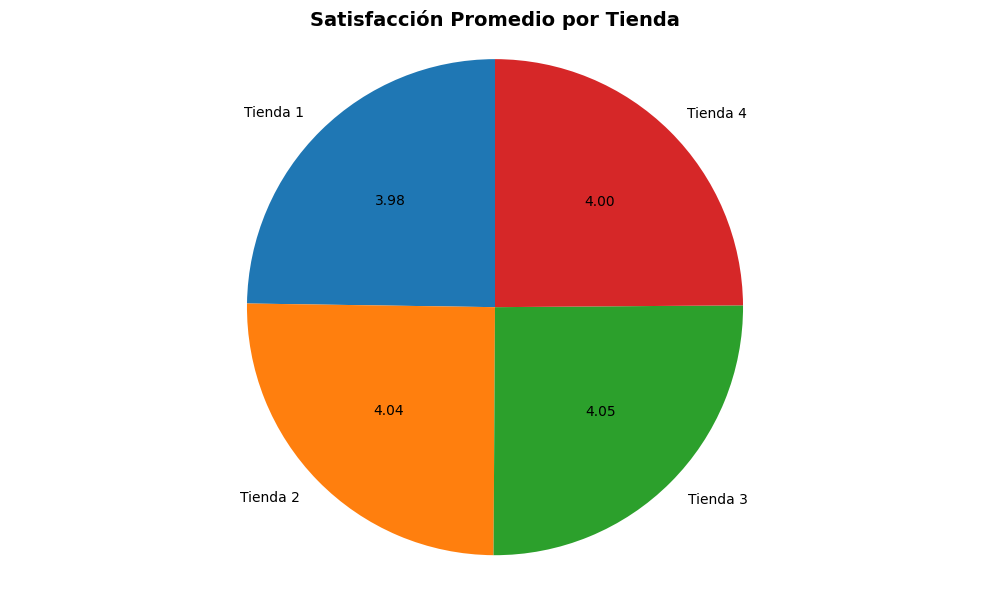

In [ ]:
Calificacion_grafica = df.groupby('Tienda')['Calificación'].mean()
total = Calificacion_grafica.sum()

plt.figure(figsize=(10, 6))
plt.pie(
    Calificacion_grafica,
    labels=Calificacion_grafica.index,
    autopct=lambda pct: f'{pct * total / 100:.2f}',
    startangle=90,
)
plt.title('Satisfacción Promedio por Tienda', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 4. Productos más y menos vendidos

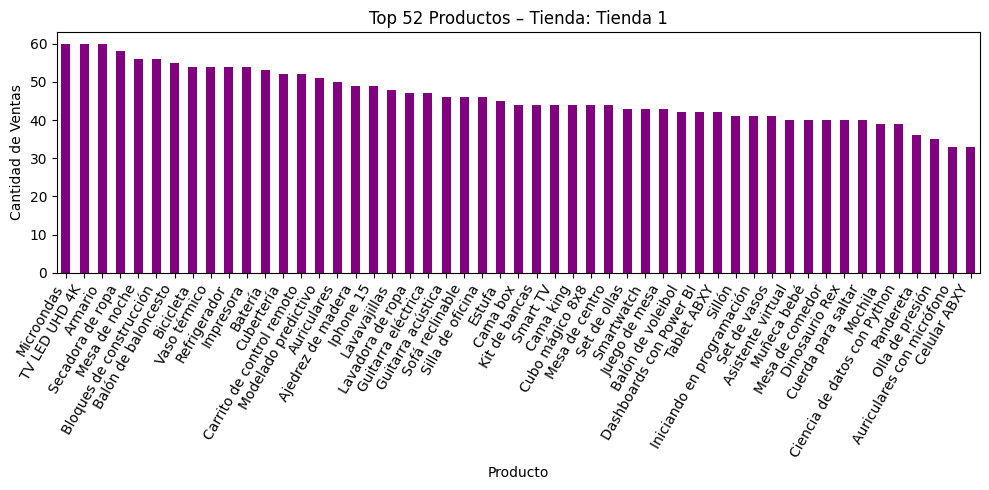

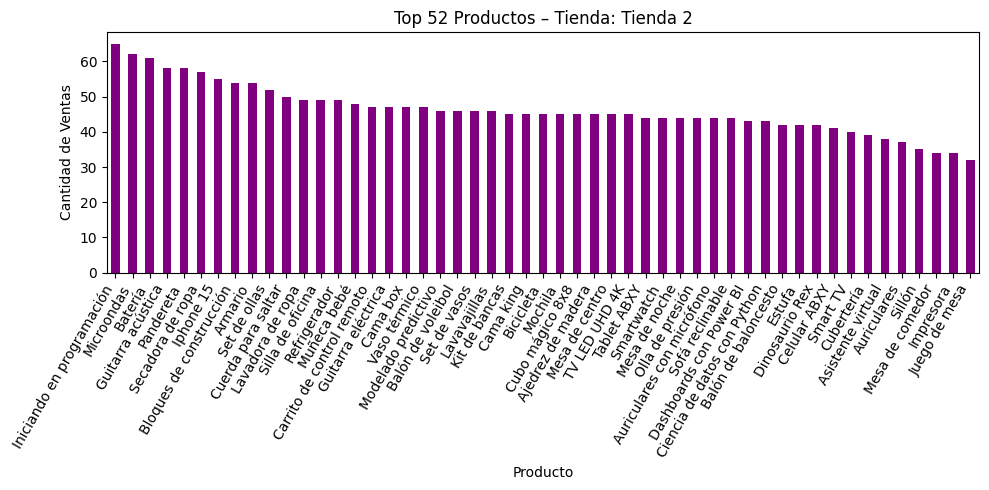

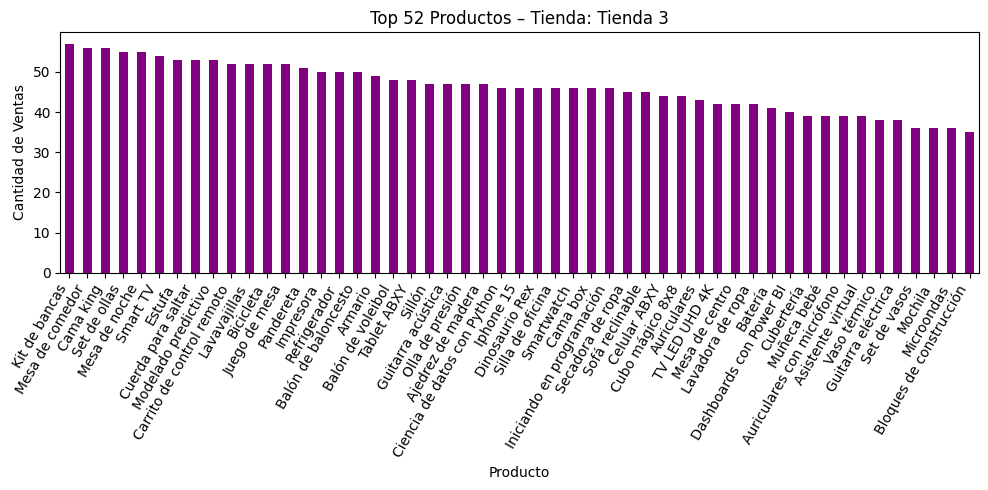

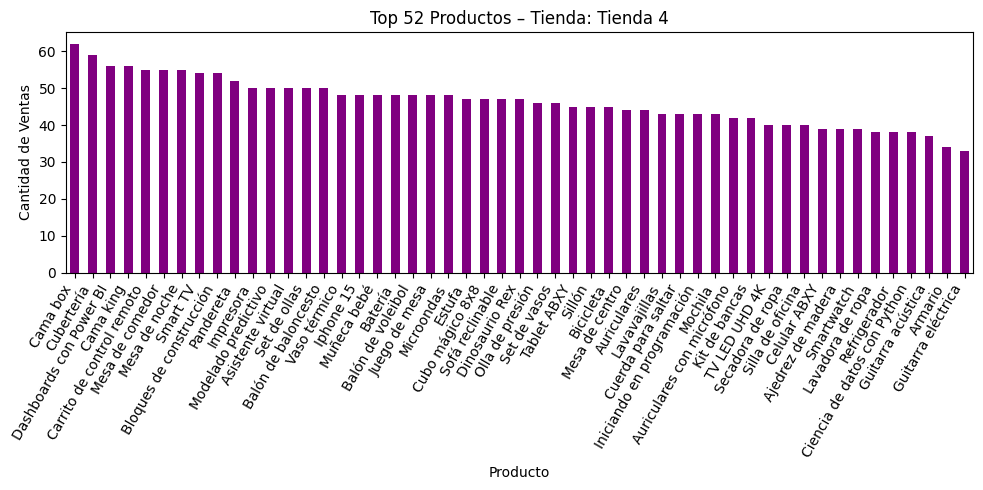

In [ ]:
num_tiendas = 4
top_tiendas = df['Tienda'].value_counts().nlargest(num_tiendas).index

top_productos = 52

for tienda in top_tiendas:
    df_tienda = df[df['Tienda'] == tienda]
    top_prod_tienda = df_tienda['Producto'].value_counts().head(top_productos)

    plt.figure(figsize=(10, 5))
    top_prod_tienda.plot(kind='bar', color='purple')
    plt.title(f'Top {top_productos} Productos – Tienda: {tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
print("Productos mas y menos vendidos en cada tienda \nen orden descendente:")
print()
for nombre_tienda, grupo in df.groupby('Tienda'):
  ventas_producto = grupo['Producto'].value_counts()
  mas_vendido = ventas_producto.index[0]
  menos_vendido = ventas_producto.index[-1]
  cantidad = ventas_producto.iloc[-1]
  cantidadv = ventas_producto.iloc[0]

  print(f"{nombre_tienda}:")
  print(f"Producto más vendido: {mas_vendido} ({cantidadv} ventas)")
  print(f"Producto menos vendido: {menos_vendido} ({cantidad} ventas)")
  print()

Productos mas y menos vendidos en cada tienda 
en orden descendente:

Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Celular ABXY (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



## 5. Envío promedio por tienda

In [ ]:
costo_envio_tienda = df.groupby('Tienda')['Costo de envío'].mean()

for tienda, total in costo_envio_tienda.items():
    print(f"{tienda}: ${total:,.2f}")
    print()

print("\nLa tienda con mayor costo promedio de envio es:", costo_envio_tienda.idxmax())


Tienda 1: $26,018.61

Tienda 2: $25,216.24

Tienda 3: $24,805.68

Tienda 4: $23,459.46


La tienda con mayor costo promedio de envio es: Tienda 1


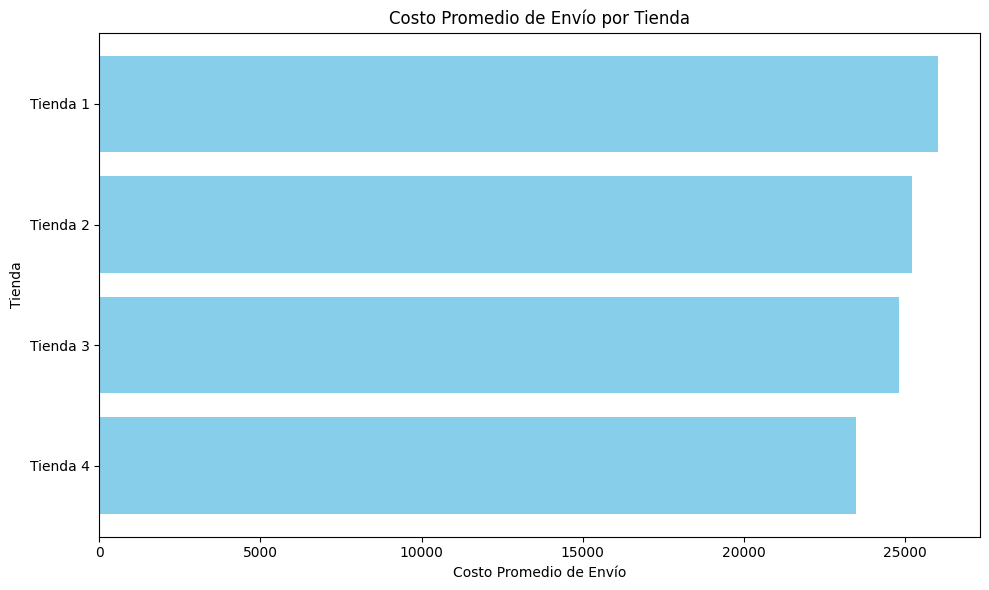

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(costo_envio_tienda.index, costo_envio_tienda.values, color='skyblue')
plt.xlabel('Costo Promedio de Envío')
plt.ylabel('Tienda')
plt.title('Costo Promedio de Envío por Tienda')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Mapa de calor


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from matplotlib.colors import LinearSegmentedColormap

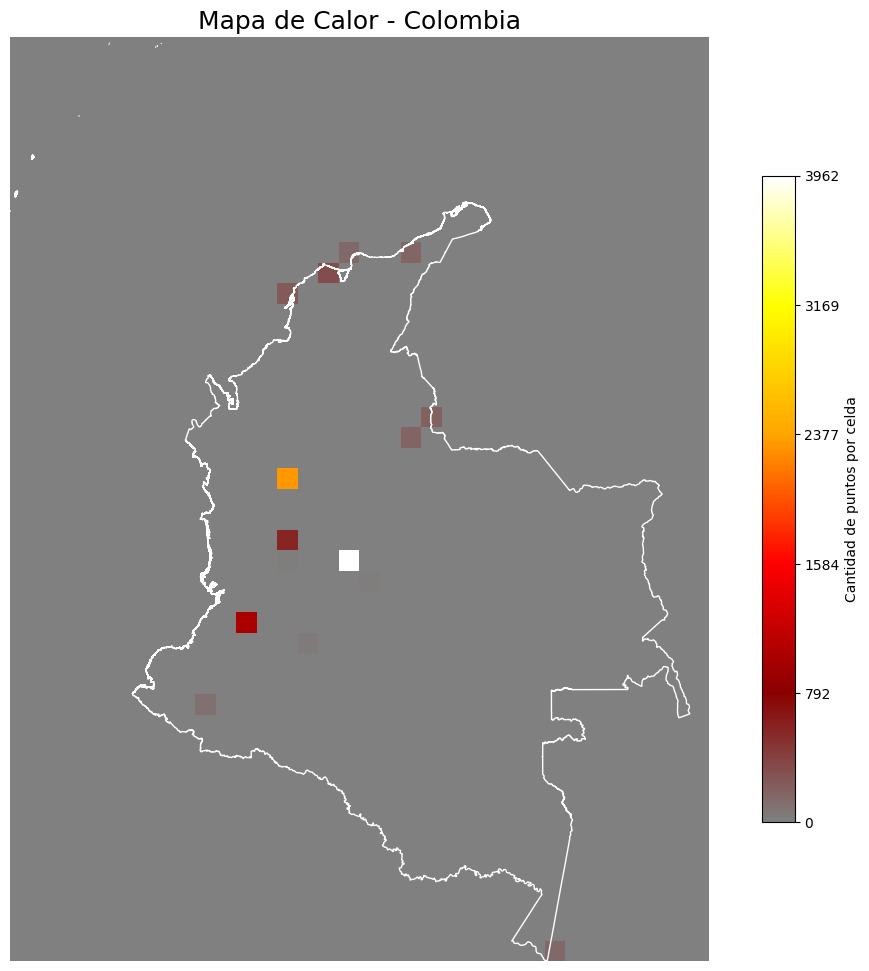

In [ ]:
tienda = pd.read_csv(url)
tienda['Tienda'] = 'Tienda 1'
tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'
tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'
tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df = df.dropna(subset=['lat', 'lon'])


CRS_LAT_LON = "EPSG:4326"
CRS_COLOMBIA = "EPSG:3116"
geometry = gpd.points_from_xy(df['lon'], df['lat'], crs=CRS_LAT_LON)
gdf = gpd.GeoDataFrame(df, geometry=geometry).to_crs(CRS_COLOMBIA)


url_municipios = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_COL_shp.zip"

municipios = gpd.read_file(
    url_municipios,
    layer="gadm41_COL_0"
).to_crs(CRS_COLOMBIA)


minx, miny, maxx, maxy = municipios.total_bounds

bbox = box(minx, miny, maxx, maxy)

gdf = gdf[gdf.geometry.within(bbox)].copy()


GRID_SIZE_METERS = 50000

x_bins = np.arange(minx, maxx + GRID_SIZE_METERS, GRID_SIZE_METERS)
y_bins = np.arange(miny, maxy + GRID_SIZE_METERS, GRID_SIZE_METERS)

heatmap, x_edges, y_edges = np.histogram2d(
    gdf.geometry.x,
    gdf.geometry.y,
    bins=[x_bins, y_bins]
)



colors = ['grey', 'darkred', 'red', 'orange', 'yellow', 'white']
cmap = LinearSegmentedColormap.from_list('custom_heat', colors)

vmax = np.max(heatmap)


fig, ax = plt.subplots(figsize=(14, 12))

municipios.boundary.plot(ax=ax, color='white', linewidth=1)

img = ax.imshow(
    heatmap.T,
    extent=[x_edges[0], x_edges[-1],
            y_edges[0], y_edges[-1]],
    origin='lower',
    cmap=cmap,
    alpha=1.0,
    vmin=0,
    vmax=vmax
)

ax.set_title('Mapa de Calor - Colombia', fontsize=18)
ax.axis('off')


ticks = np.linspace(0, vmax, 6, dtype=int)

cbar = plt.colorbar(img, ax=ax, shrink=0.7, ticks=ticks)
cbar.set_label('Cantidad de puntos por celda')
cbar.ax.set_yticklabels(list(map(str, ticks)))

plt.show()

# Indice de rendimiento


## Construccion del indice de rendimiento Indice de rendimiento

Para poder comprara las tiendas de manera mas objetiva, se construyo un indice basado en cuatro variables clave: Facturacion total, volumen de ventas, calificacion promedio y costo de envio.

Para construir el indice de rendimiento se necesita usar metricas. Para esto normalizaremos la cantidad maxima y minima de cada variable clave con estas dos formulas.



---


- cuando menor es mejor

$$
X_{\text{norm}} = \frac{X_{\max} - X}{X_{\max} - X_{\min}}
$$



---



- cuando mayor es mejor

$$
X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$



Tambien hay que darle pesos a las variables que se van a medir en este caso se tiene que dar un porcentaje a cada una de ellas asegurandose de que los valores sumen 100%.

En este notebook se tomaran los siguientes valores

- 40% Facturacion
- 30% Cantidad de ventas
- 20% Calificacion
- 10% Costo de envio

Entonces para medir el indice de rendimiento se utilizara la siguiente formula.

$$
Indice = 0.4F + 0.3V + 0.2C + 0.1E
$$

In [7]:
resumen = df.groupby("Tienda").agg({
    "Precio": "sum",
    "Producto": "count",
    "Calificación": "mean",
    "Costo de envío": "mean"
}).reset_index()

# Facturación
resumen["F_norm"] = (resumen["Precio"] - resumen["Precio"].min()) / \
                     (resumen["Precio"].max() - resumen["Precio"].min())

# Ventas
resumen["V_norm"] = (resumen["Producto"] - resumen["Producto"].min()) / \
                     (resumen["Producto"].max() - resumen["Producto"].min())

# Calificación
resumen["C_norm"] = (resumen["Calificación"] - resumen["Calificación"].min()) / \
                     (resumen["Calificación"].max() - resumen["Calificación"].min())

# Costo de Envío
resumen["E_norm"] = (resumen["Costo de envío"].max() - resumen["Costo de envío"]) / \
                     (resumen["Costo de envío"].max() - resumen["Costo de envío"].min())

In [8]:
resumen["Score"] = (
    0.4 * resumen["F_norm"] +
    0.3 * resumen["V_norm"] +
    0.2 * resumen["C_norm"] +
    0.1 * resumen["E_norm"]
)
ranking = resumen.sort_values("Score", ascending=False)
ranking

,Tienda,Precio,Producto,Calificación,Costo de envío,F_norm,V_norm,C_norm,E_norm,Score
1,Tienda 2,1.116344e+09,2359,4.037304,25216.235693,0.693018,1.0,0.846154,0.313531,0.777791
2,Tienda 3,1.098020e+09,2359,4.048326,24805.680373,0.530146,1.0,1.000000,0.473957,0.759454
0,Tienda 1,1.150880e+09,2359,3.976685,26018.609580,1.000000,1.0,0.000000,0.000000,0.700000
3,Tienda 4,1.038376e+09,2358,3.995759,23459.457167,0.000000,0.0,0.266247,1.000000,0.153249


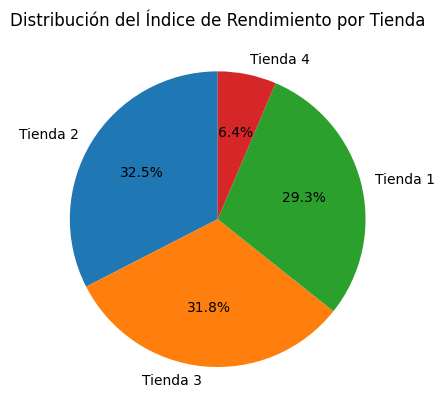

In [9]:

ranking = resumen.sort_values("Score", ascending=False)


plt.figure()


plt.pie(
    ranking["Score"],
    labels=ranking["Tienda"],
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribución del Índice de Rendimiento por Tienda")
plt.show()

## Interpretación del Índice de Rendimiento

Dado que el análisis considera cuatro tiendas pertenecia del Sr. Juan, el rendimiento equilibrado esperado sería del 25% para cada una.

Sin embargo, se observa que una de las tiendas presenta únicamente un 6.4% del rendimiento total, lo que representa una diferencia de 18.6 puntos porcentuales respecto al valor esperado.

En términos relativos, esta tienda rinde apenas el 25.6% de lo que rendiría si estuviera en el promedio general.

Por otro lado, las tres tiendas restantes muestran porcentajes muy similares entre sí (variaciones de ±3%), lo que indica un desempeño competitivo y relativamente equilibrado entre ellas.


---


Por lo tanto, el índice compuesto identifica claramente una tienda con rendimiento significativamente inferior.

En este caso es la **Tienda 4** presenta únicamente un 6.4% del rendimiento total según el índice compuesto.

Esto indica que, en comparación con las demás tiendas, su desempeño es significativamente inferior en los criterios evaluados (facturación, volumen de ventas, calificación y costos de envío).

Por lo tanto, es la candidata con menor rendimiento general.